This is the analysis of ARF data:
analysis of Family, add 'Depth' and 'Donor' as features in prediction model.
Using 'Phase' as response variable which has 5 levels

In [1]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import FS
import metric

2025-03-10 00:55:48.937012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle
import matplotlib.pyplot as plt
import glob
import os

### Data preprocess


In [3]:
# target variable
metadata_bact= pd.read_csv('../data/ARF_16S_metadata.csv',index_col = 0)

In [4]:
metadata_bact

,Sample,Sample_name,Type,Location,Depth,Study_day,Sort1,Sort2,Stage,Stage1,...,CN_ratio,copies.gdw,log.copies.gdw,fungal.bacterial.ratio,log.f.b.ratio,Chao1,Shannon,InvSimpson,Phase,Donor
SP_A0,con15_mean,A0,con15,control,core,0,A,con,Initial,Control,...,13.441867,4.455430e+09,9.648889,0.018761,-1.726748,4519.472160,6.624858,208.516238,Initial,Control
SP_A0_CONINT,conint_mean,A0_CONINT,conint,control,interface,0,A,con,Initial,Control,...,15.469767,1.846670e+09,9.266390,0.052861,-1.276864,4444.733485,6.462025,149.034180,Initial,Control
SP_A0_CORE1,gr_15_sp1,A0_CORE1,gr15,grave,core,0,A,DA,Initial,D_Initial,...,13.054900,5.649630e+09,9.752020,0.018689,-1.728420,4506.556818,6.249346,121.798808,Initial,Donor1
SP_A0_CORE2,gr_15_sp2,A0_CORE2,gr15,grave,core,0,A,DA,Initial,D_Initial,...,13.353700,5.472100e+09,9.738154,0.015939,-1.797540,5374.504970,6.304635,120.388345,Initial,Donor2
SP_A0_CORE3,gr_15_sp3,A0_CORE3,gr15,grave,core,0,A,DA,Initial,D_Initial,...,13.179500,3.839910e+09,9.584321,0.039678,-1.401455,5235.051661,6.165267,108.686395,Initial,Donor3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIN_V384_CORE2,gr_15_win2,V384_CORE2,gr15,grave,core,384,V,V,Skeletonization10,H_Skeletonization,...,12.715000,2.729230e+10,10.436041,0.113406,-0.945363,4574.817289,6.248682,103.826366,RECOVERY,Donor2_win
WIN_V384_CORE3,gr_15_win3,V384_CORE3,gr15,grave,core,384,V,V,Skeletonization10,H_Skeletonization,...,10.938100,2.768460e+10,10.442238,0.153057,-0.815146,2067.000000,5.805210,118.902115,RECOVERY,Donor3_win
WIN_V384_IN1,gr_int_win1,V384_IN1,grint,grave,interface,384,V,V,Skeletonization10,H_Skeletonization,...,11.135800,3.847180e+10,10.585143,0.213479,-0.670644,4288.837004,6.218457,127.487665,RECOVERY,Donor1_win
WIN_V384_IN2,gr_int_win2,V384_IN2,grint,grave,interface,384,V,V,Skeletonization10,H_Skeletonization,...,13.479300,5.061330e+10,10.704264,0.149665,-0.824881,4027.835411,6.153355,137.919647,RECOVERY,Donor2_win


In [65]:
y = metadata_bact['Phase'].values 
pd.Series(y).value_counts()

RECOVERY    136
DECLINE      64
BLOOM        48
CLIMAX       48
Initial      16
Name: count, dtype: int64

In [6]:
cts_family_combine = pd.read_csv('../data/ARF_16S_ctb_Family.csv',index_col = 0)


In [7]:
cts_family_combine.shape

(312, 442)

In [8]:
# Reorder df1 based on df2's index
cts_family_combine = cts_family_combine.reindex(metadata_bact.index)
cts_family_combine

,Xiphinematobacteraceae,Xanthobacteraceae,Chthoniobacteraceae,Rhodanobacteraceae,Corynebacteriaceae,Subgroup_6_fa,Burkholderiaceae,Mycobacteriaceae,Enterococcaceae,Nocardiaceae,...,Gracilibacteria_unclassified,Armatimonadetes_unclassified,Catenulisporaceae,27F-1492R,bac2nit3,Candidatus_Azambacteria_fa,Clostridia_unclassified,Bacilli_unclassified,Lineage_IIc_fa,Victivallaceae
SP_A0,234.172682,443.550609,378.533253,8.815913,0.000000,1032.012783,109.647914,76.588242,0.000000,6.060940,...,0.000000,0.000000,0.550995,1.101989,0.000000,1.101989,0.0,0.0,0.550995,0.0
SP_A0_CONINT,139.478198,346.212874,262.706509,50.555204,0.000000,992.145888,352.080888,64.999549,0.000000,22.117902,...,0.902772,0.000000,0.000000,0.000000,0.000000,0.451386,0.0,0.0,0.000000,0.0
SP_A0_CORE1,459.284589,785.812464,375.808777,5.028663,0.000000,836.434342,94.874116,142.814040,0.335244,11.733548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
SP_A0_CORE2,351.996220,773.551723,561.724020,2.624879,0.787464,922.119852,93.708166,98.432947,0.000000,4.724781,...,0.000000,0.000000,0.262488,0.000000,0.000000,1.574927,0.0,0.0,0.524976,0.0
SP_A0_CORE3,392.253406,671.991539,580.994584,0.911793,0.000000,855.626675,70.937506,69.843354,0.182359,2.917738,...,0.182359,0.182359,0.000000,0.000000,0.000000,0.182359,0.0,0.0,0.182359,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIN_V384_CORE2,299.807903,870.266191,740.257958,15.436334,0.000000,763.927003,116.287047,155.735456,0.000000,34.645993,...,0.000000,0.000000,0.000000,0.343030,0.686059,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_CORE3,160.550459,452.981651,203.555046,632.167431,30.103211,409.977064,564.793578,153.383028,5.733945,64.506881,...,0.000000,0.000000,0.000000,0.000000,1.433486,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_IN1,407.015004,741.642538,531.718873,22.045275,3.290340,868.649645,147.407212,205.317189,0.000000,123.716768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_IN2,37.829836,265.513757,214.995653,157.663479,2.349679,172.466458,686.106346,218.755140,0.000000,345.637820,...,0.000000,0.000000,0.000000,0.000000,0.234968,0.000000,0.0,0.0,0.000000,0.0


In [9]:
feature_names = cts_family_combine.columns

##### 1. calculate H statistics for OTU/phylum/class/order (both 16s and ITS)

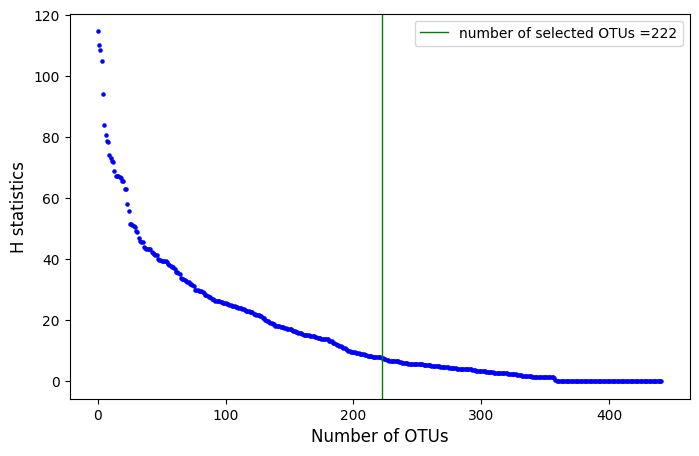

In [66]:
select_result = FS.SelectMicro_fun(cts_family_combine,y
                                   ,threshold=0.001
                                  )

data = select_result['relative_abundance_data']
weights = select_result['H_score']
selectedOTU_index = select_result['selected_indices']
X_FS = select_result['selected_data']
selectedASVs = select_result['selected_columnames']

In [67]:
selectedASVs

Index(['Enterococcaceae', 'Rhodanobacteraceae', 'Chitinophagaceae',
       'Micropepsaceae', 'Wohlfahrtiimonadaceae', 'Devosiaceae',
       'Peptostreptococcaceae', 'JG30-KF-CM45', 'Corynebacteriaceae',
       'Acetobacteraceae',
       ...
       'R7C24_fa', 'Thermoleophilia_unclassified', 'KD3-93',
       'Unknown_Family.1', 'OPB41_fa', 'Subgroup_22_fa', 'Peptococcaceae',
       'Microgenomatia_fa', 'Family_XIII', 'Caldilineaceae'],
      dtype='object', length=222)

In [68]:
data

array([[0.02344052, 0.0443991 , 0.03789091, ..., 0.        , 0.        ,
        0.        ],
       [0.01395916, 0.03464944, 0.02629201, ..., 0.        , 0.        ,
        0.        ],
       [0.0459454 , 0.07861024, 0.03759474, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04071758, 0.07419355, 0.05319289, ..., 0.        , 0.        ,
        0.        ],
       [0.00378672, 0.0265776 , 0.0215208 , ..., 0.        , 0.        ,
        0.        ],
       [0.00349187, 0.01830223, 0.00602047, ..., 0.        , 0.        ,
        0.        ]])

#### 4. Model
Prepare 4 datasets: full dataset, our selected dataset, Lasso selected  dataset(based on the target variable), randomly selected data (selected the same numer of variables as in our method)

Use random forest and SVM as classifier, and will build both models for each response variable.

For Lasso, the dataset will be determined by the response variable, so the lasso subset is different for the models for different response variables.

For random selection, the  process will repeat iter=30 times to  find the mean accuracy and AUC

SMOTE  is used (the data is not balanced, as we can see the performance is really bad especially for SVM model when not using SMOTE)

In [69]:
iter =30
cls = ["RF","SVM", "CatBoost","NB"]

In [70]:
custom_phaseorder = ['Initial', 'BLOOM', 'CLIMAX', 'DECLINE', 'RECOVERY']
custom_mapping = {category: i for i, category in enumerate(custom_phaseorder)}
y = [custom_mapping[category] for category in y]
y = np.array(y)

In [71]:
targetLabel=y

In [72]:
targetLabel

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [73]:
X_lasso_ft,xlabel_lasso_ft  = RunML.LassoFS_CV(data,targetLabel)

X_FS_lasso_ft,xlabel_FS_lasso_ft0  = RunML.LassoFS_CV(X_FS,targetLabel)
xlabel_FS_lasso_ft = selectedOTU_index[xlabel_FS_lasso_ft0]

data_subset = {"AllFeatures":data, 
           "SelectMicro": X_FS,
           "Lasso_finetune":X_lasso_ft,
           "FS_Lassofinetune":X_FS_lasso_ft
          }

Best alpha: 0.1
Best alpha: 0.1


In [74]:
   for datatype, subset in data_subset.items():
        print(datatype,np.shape(subset))

AllFeatures (312, 442)
SelectMicro (312, 222)
Lasso_finetune (312, 33)
FS_Lassofinetune (312, 32)


In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
import shap

In [36]:
# Set up 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)
sm = SMOTE(k_neighbors=5, random_state=777)

In [41]:
clf = RandomForestClassifier(n_jobs=5, random_state=777)

# performance reports
accuracy_results = list()
f1_results = list()
precision_results = list()
recall_results = list()

for train_index, test_index in kf.split(data, y):
        # Split the data
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train, y_train = sm.fit_resample(X_train, y_train)
     
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)[:, 1]
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        # roc_auc = roc_auc_score(y_test, y_prob)
        # mcc = metric.mcc_score(y_test,y_pred)
        f_score = f1_score(y_test,y_pred,average='weighted')
        prec = precision_score(y_test, y_pred,average='weighted')
        rec = recall_score(y_test, y_pred,average='weighted')

        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_test)

        # store the result
        accuracy_results.append(accuracy)
        f1_results.append(f_score)
        precision_results.append(prec)
        recall_results.append(rec)

# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f), F1: %.3f (%.3f), Precision: %.3f (%.3f), Recall: %.3f (%.3f)' % (np.mean(accuracy_results), np.std(accuracy_results), np.mean(f1_results), np.std(f1_results), np.mean(precision_results), np.std(precision_results), np.mean(recall_results), np.std(recall_results)))

Accuracy: 0.632 (0.060), F1: 0.626 (0.051), Precision: 0.644 (0.044), Recall: 0.632 (0.060)


In [42]:
clf = RandomForestClassifier(n_jobs=5, random_state=777)
# performance reports
accuracy_results = list()
f1_results = list()
precision_results = list()
recall_results = list()

for train_index, test_index in kf.split(X_FS_lasso_ft, y):
        # Split the data
        X_train, X_test = X_FS_lasso_ft[train_index], X_FS_lasso_ft[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train, y_train = sm.fit_resample(X_train, y_train)
     
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)[:, 1]
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        # roc_auc = roc_auc_score(y_test, y_prob)
        # mcc = metric.mcc_score(y_test,y_pred)
        f_score = f1_score(y_test,y_pred,average='weighted')
        prec = precision_score(y_test, y_pred,average='weighted')
        rec = recall_score(y_test, y_pred,average='weighted')

        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_test)

        # store the result
        accuracy_results.append(accuracy)
        f1_results.append(f_score)
        precision_results.append(prec)
        recall_results.append(rec)

# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f), F1: %.3f (%.3f), Precision: %.3f (%.3f), Recall: %.3f (%.3f)' % (np.mean(accuracy_results), np.std(accuracy_results), np.mean(f1_results), np.std(f1_results), np.mean(precision_results), np.std(precision_results), np.mean(recall_results), np.std(recall_results)))

Accuracy: 0.609 (0.057), F1: 0.601 (0.072), Precision: 0.604 (0.087), Recall: 0.609 (0.057)


### Model with location

In [43]:
accuracy_results

[0.5238095238095238,
 0.6825396825396826,
 0.6612903225806451,
 0.5806451612903226,
 0.5967741935483871]

In [39]:
f1_results

[0.5589003032612055,
 0.6532659886697154,
 0.5829843425768721,
 0.630712005748278,
 0.7032258064516128]

In [44]:

clf = RandomForestClassifier(n_jobs=5, random_state=777)
# performance reports
accuracy_results = list()
f1_results = list()
precision_results = list()
recall_results = list()

for train_index, test_index in kf.split(X_lasso_ft, y):
        # Split the data
        X_train, X_test = X_lasso_ft[train_index], X_lasso_ft[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train, y_train = sm.fit_resample(X_train, y_train)
     
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)[:, 1]
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        # roc_auc = roc_auc_score(y_test, y_prob)
        # mcc = metric.mcc_score(y_test,y_pred)
        f_score = f1_score(y_test,y_pred,average='weighted')
        prec = precision_score(y_test, y_pred,average='weighted')
        rec = recall_score(y_test, y_pred,average='weighted')

        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_test)

        # store the result
        accuracy_results.append(accuracy)
        f1_results.append(f_score)
        precision_results.append(prec)
        recall_results.append(rec)

# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f), F1: %.3f (%.3f), Precision: %.3f (%.3f), Recall: %.3f (%.3f)' % (np.mean(accuracy_results), np.std(accuracy_results), np.mean(f1_results), np.std(f1_results), np.mean(precision_results), np.std(precision_results), np.mean(recall_results), np.std(recall_results)))

Accuracy: 0.635 (0.058), F1: 0.629 (0.070), Precision: 0.643 (0.081), Recall: 0.635 (0.058)


### Model with donor